## Perceptron

This notebook will attempt to guide you through the implementation of vanilla Perceptron. If everything goes right, in the end you should be able to use your code to visualize the training process as an animation. Start running the cells and fill in the missing code. 

Let us start by importing libraries for manipulating vectors (`numpy`) and for plotting (all the others below).

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import matplotlib.animation as animation
from IPython.display import HTML

In [3]:
# Color settings for plotting
colors = ['darkred', 'royalblue']
colors_region = ['mistyrose', 'lightsteelblue']
cmap = ListedColormap(colors)
cmap_region = ListedColormap(colors_region)

It is often useful to set the random seed to ensure that two different runs of the learning algorithm produce the same results. Of course, the learning algorithm should not work for just this one random seed we pick. We do this only to ensure reproducibility.

In [2]:
np.random.seed(0) #Setting a random seed is important for reproducibility

### The dataset
We're going to create a 2d dataset by combining clusters generated by two gaussians with means (0, 0), (3, 3) and unit variance. We will create a helper function for shuffling examples along the way.

In [4]:
# A function that shuffles two arrays with the exact same order
def shuffle_arrays(X, Y):
    idx = np.arange(X.shape[0])
    np.random.shuffle(idx)
    return X[idx], Y[idx]

In [7]:
def generate_data(num_samples):
    size = num_samples // 2
    x1 = np.random.multivariate_normal([0, 0], np.eye(2), size)
    y1 = -np.ones(size).astype(int)
    x2 = np.random.multivariate_normal([3, 3], np.eye(2), size)
    y2 = np.ones(size).astype(int)
    
    x = np.vstack((x1, x2))
    y = np.append(y1, y2)
    idx = np.arange(x.shape[0])
    np.random.shuffle(idx)
    
    return shuffle_arrays(x, y)

The convenient thing about a two dimensional dataset is that we can actually visualize it on this notebook. Let's write a helper function to plot the two dimensional dataset consisting of instances (`x`) and labels (`y`).

In [8]:
def plot(x, y):
    fig = plt.figure(figsize = (7, 5), dpi = 100, facecolor = 'w')
    plt.scatter(x[:, 0], x[:, 1], c=y, edgecolor='black', cmap=cmap)
    plt.show()

We can now create a training set with 150 examples and visualize it.

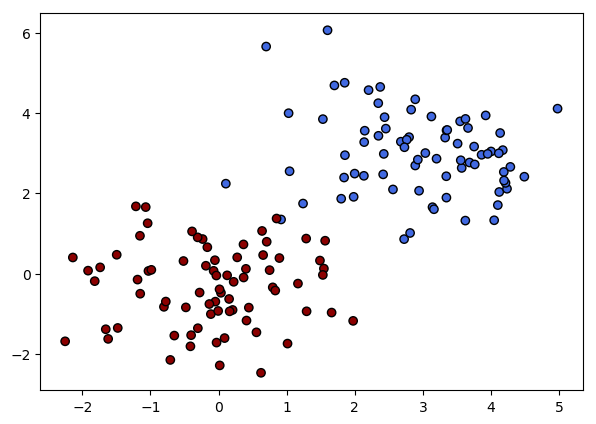

In [9]:
X_train, y_train = generate_data(150)
plot(X_train, y_train)

## Implementation

Now, you will need to fill in the remaining functions using what we have seen in class. To help your implementation, you can use the hard coded values below for debugging/testing your implementation.

**These values will be used to test your implementations:**

In [12]:
w_t = np.array([1., -1.])
b_t = 0.5
X_t = np.array([-0.1, 0.8, 0.5, 0.5, -0.5, -0.5, 0, 0, -0.5, 0.5]).reshape(5, 2)
x_t = np.array([0.3, 0.3])
y_t = -1
lr_t = 0.1

### Predict Function

Implement a function that predicts on input points using the weight vector w and the bias b.  
Remember that the decision rule is defined by:  
$w^Tx + b \ge 0 \rightarrow 1$  
$w^Tx + b < 0 \rightarrow -1$

In [13]:
'''
    X: input vector or set of vectors
    w: weight vector
    b: bias
    
    Output: a numpy array containing the predictions produced by the linear threshold unit defined by w and b.
'''
def predict(X, w, b):
    #FILL IN
    pass

In [14]:
predict(X_t, w_t, b_t) #output should be: array([-1.,  1.,  1.,  1., -1.])

In [15]:
predict(x_t, w_t, b_t)  #output should be: 1.0

### Accuracy Function:
Implement a function that outputs the accuracy of the linear classifier on inputs X.

In [16]:
'''
    X: set of input vectors
    y: set of labels
    w: weight vector
    b: bias
    
    Output: The accuracy achieved by the classifier defined by w and b on samples X.
'''
def accuracy(X, y, w, b):
    #FILL IN
    pass

In [17]:
accuracy(X_t, np.ones(X_t.shape[0]), w_t, b_t) #output should be 0.6

### Update Function:
Implement the Perceptron update defined by:  
$w_{new} \leftarrow w_{old} + r*(y*x)$  
$b_{new} \leftarrow b_{old} + r*y$  

Where $r$ is the learning rate, $y$ is the label and $x$ is the training example.

In [18]:
'''
    x: input vector
    y: label
    w: weight vector
    b: bias
    lr: learning rate
    
    Updates the w and b according to the Perceptron update rule.
    
    Output: updated w and b
'''
def update(x, y, w, b, lr):
    #FILL IN
    pass

In [19]:
update(x_t, y_t, w_t, b_t, lr_t) #output should be: (array([ 0.97, -1.03]), 0.4)

### Storing updates:
In order to be able to visualize the training process we need to store all of the updates during training. The class defined below is designed to do exactly that.

In [20]:
'''
    A class that will handle the storage of the historic values of training
'''
class History:
    def __init__(self, num_epochs):
        self.training_hist = dict()
        for n in range(num_epochs):
            self.training_hist[n] = {'w_hist': [], 
                                'b_hist': [], 
                                'acc_hist': [],
                                'point_hist':[]}
    def store(self, x, y, w, b, accuracy, epoch):
        self.training_hist[epoch]['point_hist'].append((x, y))
        self.training_hist[epoch]['w_hist'].append(w.copy())
        self.training_hist[epoch]['b_hist'].append(b)
        self.training_hist[epoch]['acc_hist'].append(accuracy)

For each update in the Perceptron algorithm call the store function with the necessary inputs.  
- x, y: the point on which the mistake was made and the corresponding label of that point.
- w, b: the updated weight vector and bias
- accuracy: the accuracy over the entire training set (calculated with the new w and b)
- epoch: the current epoch number  

### Perceptron Algorithm:
Piece the functions together and implement the Perceptron algorithm.  
https://svivek.com/teaching/machine-learning/lectures/slides/perceptron/perceptron.pdf (Slide 12)  
Below is a pseudocode for the algorithm:

    initialize w and b 
    for each epoch
        shuffle the training samples
        for each x, y pair:
            predict class of x using w, b
            if mistake
                update w and b
     return w, b
            


In [21]:
def train(X_train, y_train, epochs=10, lr=0.01):
    hist = History(epochs)
    w = np.random.uniform(0, 1, size=X_train.shape[1]) #initialize w
    b = 0 #initialize bias
    
    #FILL IN
        
    return w, b, hist

### Train the classifier:

In [22]:
w, b, hist = train(X_train, y_train, epochs=10, lr=0.01)

In [23]:
accuracy(X_train, y_train, w, b)

### Visualize the training

While we can't really visualize training in general for $d$-dimensional datasets (if $d>2$), since we are looking at the two dimensional case, we can visualize how training proceeds as a video. 

The visualize function below will use your implementations to generate a video of the training history

You *may* need to download FFmpeg to render the animation. https://github.com/adaptlearning/adapt_authoring/wiki/Installing-FFmpeg

In [24]:
'''
    Given all the updates during training, creates an animation that shows how the decision boundary was affected.
'''
def visualize(X, Y, epoch_hist):
    fig = plt.figure(figsize = (7, 5), dpi = 100, facecolor = 'w')
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                         np.arange(y_min, y_max, 0.02))
    plots = []
    for e in epoch_hist:
        epoch_values = epoch_hist[e]
        w_hist = epoch_values['w_hist']
        b_hist = epoch_values['b_hist']
        acc_hist = epoch_values['acc_hist']
        point_hist = epoch_values['point_hist']
        for i in range(len(w_hist)):
            w, b = w_hist[i], b_hist[i]     
            acc = acc_hist[i]
            if i+1 < len(point_hist):
                p_x, p_y = point_hist[i+1]
            else:
                p_x, p_y = point_hist[i]
            Z = predict(np.c_[xx.ravel(), yy.ravel()], w, b)
            Z = Z.reshape(xx.shape)
            plot =  plt.contourf(xx, yy, Z, cmap=cmap_region)
            text = f'Epoch: {e + 1} - Accuracy: {round(acc, 3)}'
            te = plt.text(90, 90, text)
            an = plt.annotate(text, xy=(0.3, 1.05), xycoords='axes fraction')
            points = plt.scatter(X[:, 0], X[:, 1], c=Y, edgecolor='black', cmap=cmap)
            c_idx = 1 if p_y == 1 else 0
            if i+1 < len(point_hist):
                p = plt.scatter(x=p_x[0], y=p_x[1], s=100, c=colors[c_idx], edgecolor='black')
                plots.append(plot.collections + [te, an, points, p])
            else:
                plots.append(plot.collections + [te, an, points])
    return animation.ArtistAnimation(fig, plots, repeat=False, blit=False, interval=500)

In [ ]:
ani = visualize(X_train, y_train, hist.training_hist)

In [ ]:
HTML(ani.to_html5_video()) 

In [ ]:
# ani.save('perceptron.mp4') #If you want to store the animation as a video

### Experiment:
Play around with different learning rates and initializations. Can you explain what's going on?